<a href="https://colab.research.google.com/github/Amasha03/Customer_Churn_Prediction/blob/main/notebooks/01_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Prediction
### CM2604 Machine Learning CourseWork
Student Name : Amasha Widanagamage  
RGU ID       : 2425800  
IIT ID       : 20241246


In [63]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')

print("Libraries imported successfully")

Libraries imported successfully


In [64]:
#Load dataset
from google.colab import drive
df=pd.read_csv('/content/drive/MyDrive/ML/coursework/Telco-Customer-Churn.csv')

#Basic information
print(f"Dataset loaded successfully!")
print(f"Loaded: {df.shape[0]} rows x {df.shape[1]} columns")
print(f"\n First 5 rows:")
df.head()   #display the first 5 rows of the dataset

Dataset loaded successfully!
Loaded: 7043 rows x 21 columns

 First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
#Overview
print("Basic information about the dataset:")
df.info()

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paper

In [66]:
#Data types
print("\nData types:")
df.dtypes


Data types:


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [67]:
#Summary of statistics(Numerical)
print("\nSummary statistics (Numerical):")
df.describe()


Summary statistics (Numerical):


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [68]:
#Summary of statistics(Categorical)
print("\nSummary statistics (Categorical):")
df.describe(include='O')



Summary statistics (Categorical):


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174



Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


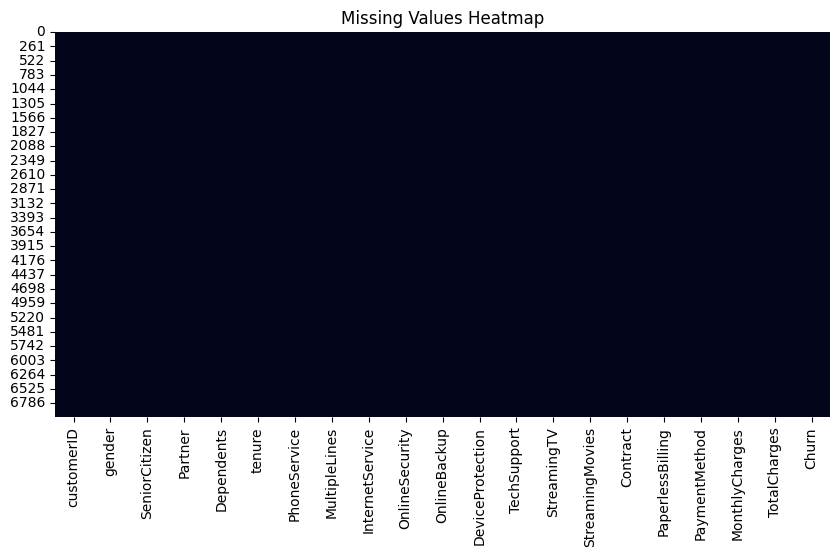

In [69]:
#Check for missing values
print("\nMissing values:")
missingValues=df.isnull().sum()
print(missingValues)

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False)  #For this missing values there's only 2 colors for missing and not missing.So the color bar is not necessary.
plt.title("Missing Values Heatmap")
plt.show()

#This heatmap shows how the missing values are spread among the dataset.
#It is one color because this doesnt have any missing values.


In [70]:
#Check for duplicate values
print("\nDuplicate values:")
duplicateValues=df.duplicated().sum()
print(duplicateValues)

#No duplicated values in the dataset


Duplicate values:
0



All columns:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Possible values:
['No' 'Yes']

Number of possible values:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


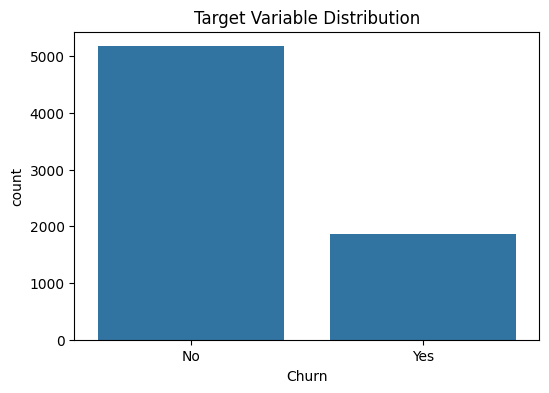

In [71]:
#Target variable (Churn) distribution

#Identify the target column
print("\nAll columns:")
print(df.columns)

#Check unique values
print("\nPossible values:")
print(df['Churn'].unique())

#count each class
print("\nNumber of possible values:")
print(df['Churn'].value_counts())

#Percentage
print("\nChurn percentage:")
print(df['Churn'].value_counts(normalize=True)*100)

#Target variable distribution visualization
plt.figure(figsize=(6,4))
sns.countplot(x="Churn",data=df)
plt.title("Target Variable Distribution")
plt.show()

#As this dataset represent 26% churned and 73% didnt churn, It makes this dataset imbalanced.


Numerical features:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


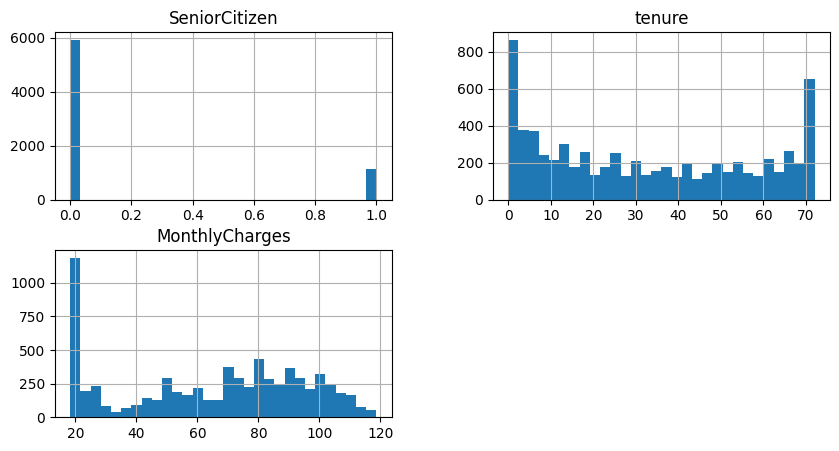

In [72]:
#Analyze each feature (Univariate Analysis)
#Numerical features

numeric_cols=df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(10,5),bins=30)
print("\nNumerical features:")
print(numeric_cols)

df[numeric_cols].describe()

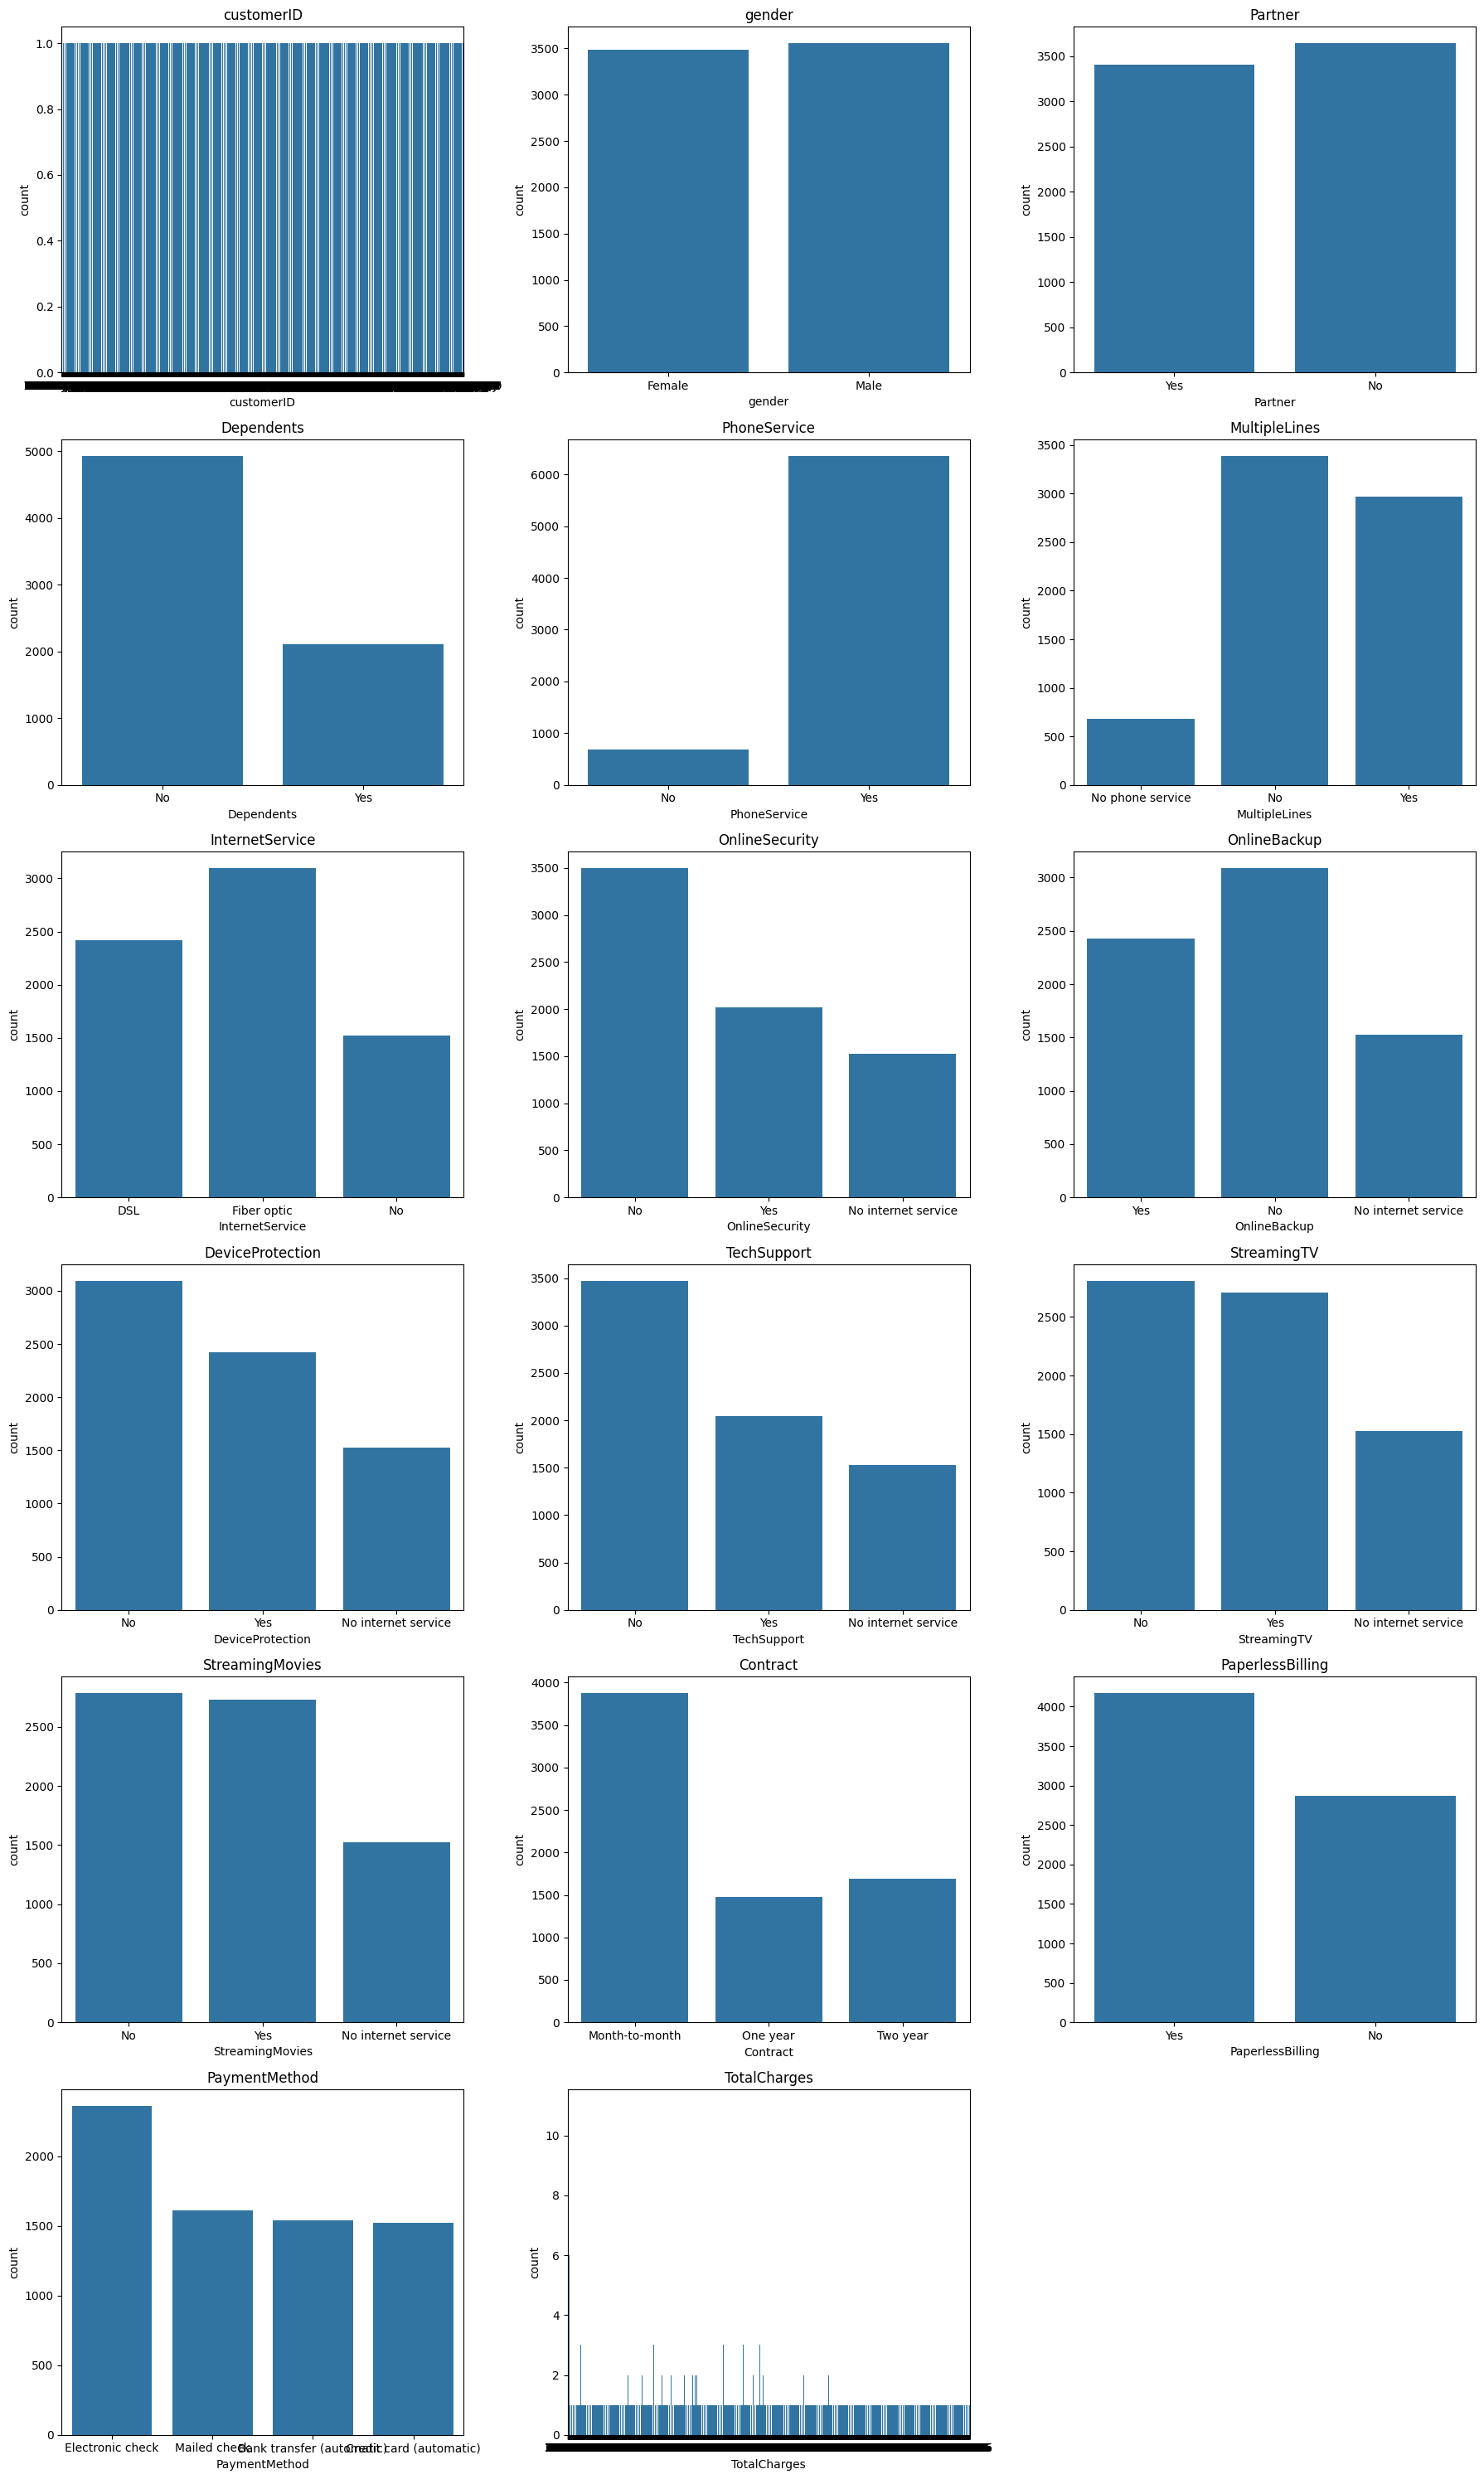

In [73]:
#Categorical features
categorical_cols=df.select_dtypes(include='object').columns.drop('Churn')

rows=math.ceil(len(categorical_cols)/3)
plt.figure(figsize=(18,5* rows))

for i,col in enumerate (categorical_cols,1):
  plt.subplot(rows,3,i)
  sns.countplot(x=col,data=df)
  plt.title(col)

plt.tight_layout()
plt.show()


In [74]:
#Number of unique values in categorical column
print("\nNumber of Unique values in categorical columns:")

for col in categorical_cols:
  print(f"{col}: {df[col].nunique()} unique values")


Number of Unique values in categorical columns:
customerID: 7043 unique values
gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
TotalCharges: 6531 unique values


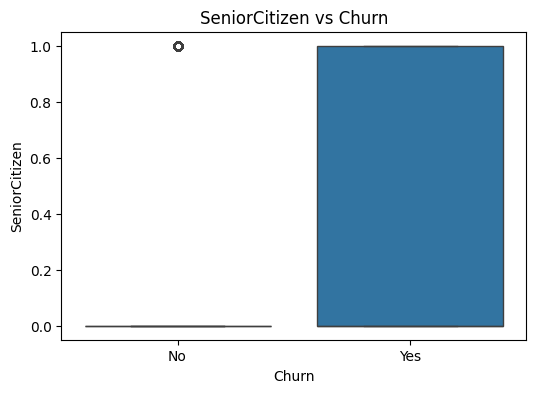


SeniorCitizen stats by Churn:
        count      mean       std  min  25%  50%  75%  max
Churn                                                     
No     5174.0  0.128721  0.334923  0.0  0.0  0.0  0.0  1.0
Yes    1869.0  0.254682  0.435799  0.0  0.0  0.0  1.0  1.0




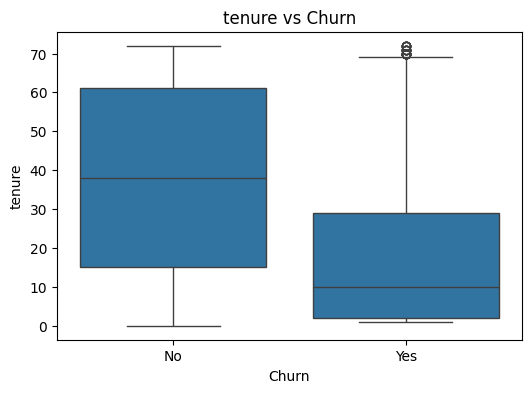


tenure stats by Churn:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0




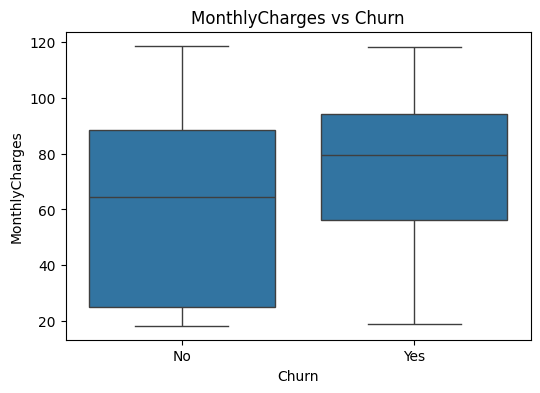


MonthlyCharges stats by Churn:
        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
No     5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35




In [75]:
#Bivariate Analysis (Feature vs Target)
#Numerical vs Churn
for col in numeric_cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(x='Churn',y=col,data=df)
  plt.title(f'{col} vs Churn')
  plt.show()

  print(f"\n{col} stats by Churn:")
  print(df.groupby('Churn')[col].describe())
  print("\n")

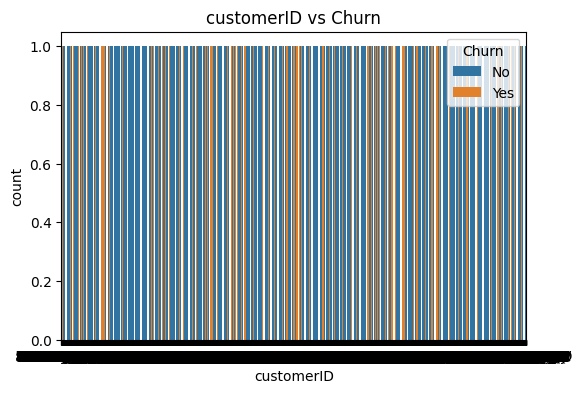

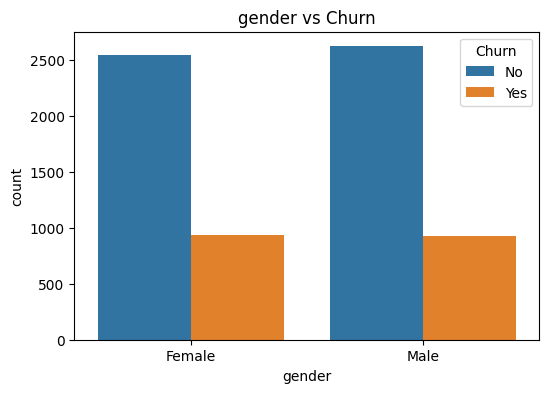

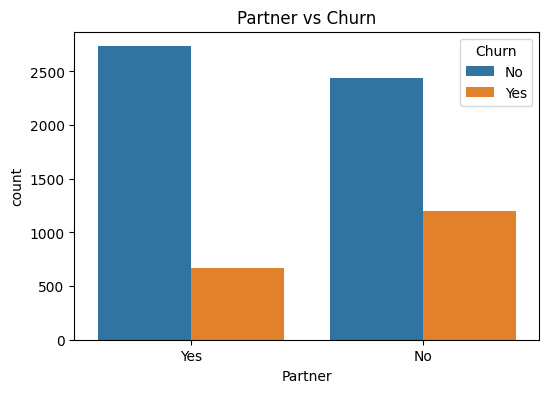

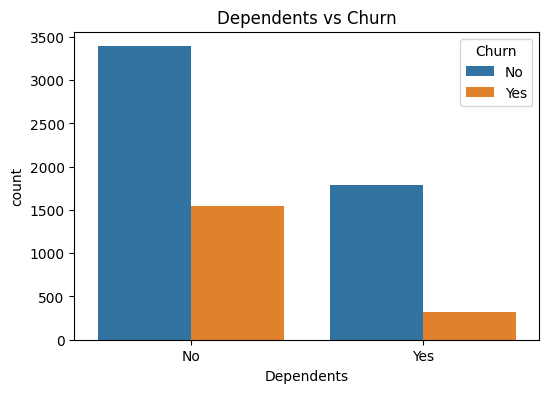

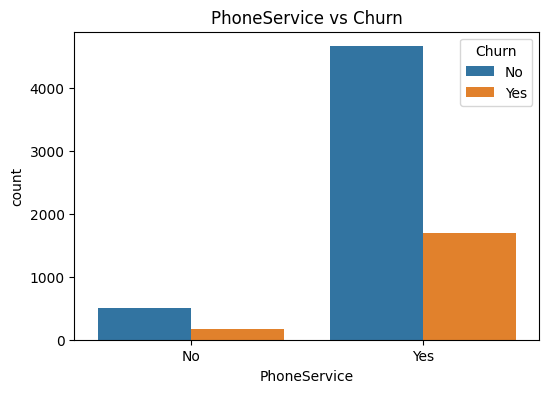

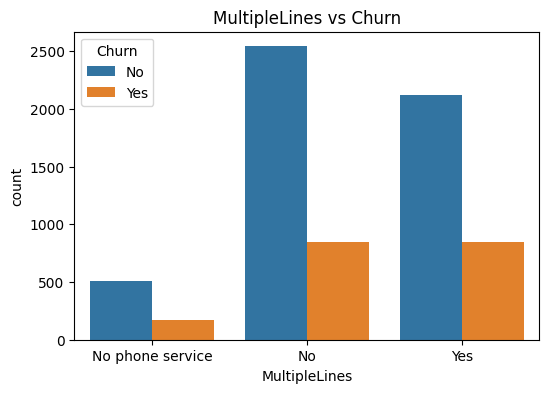

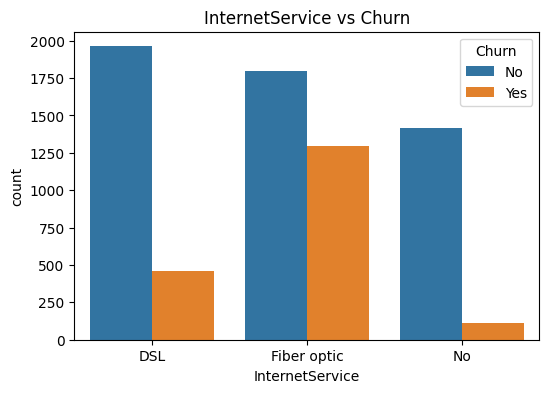

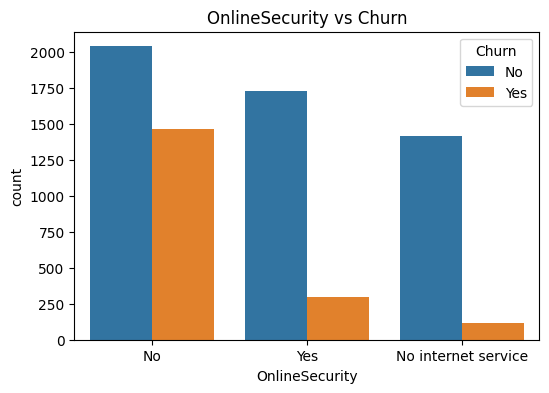

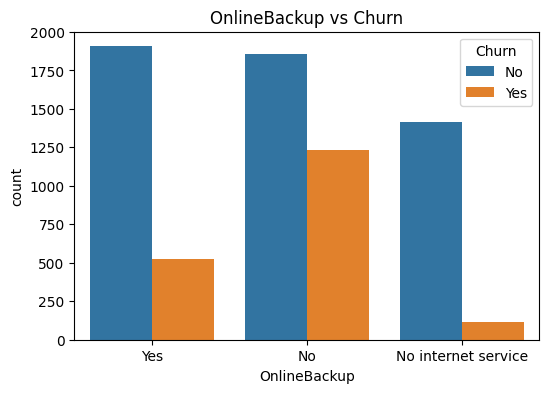

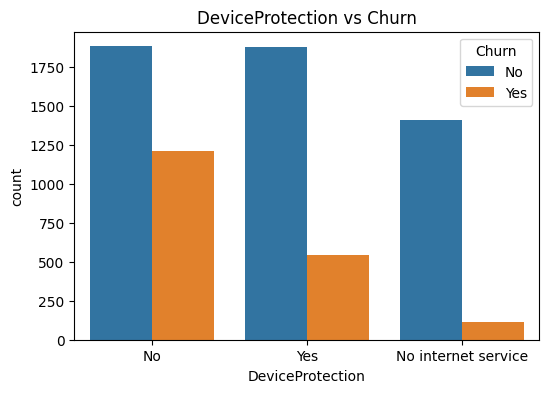

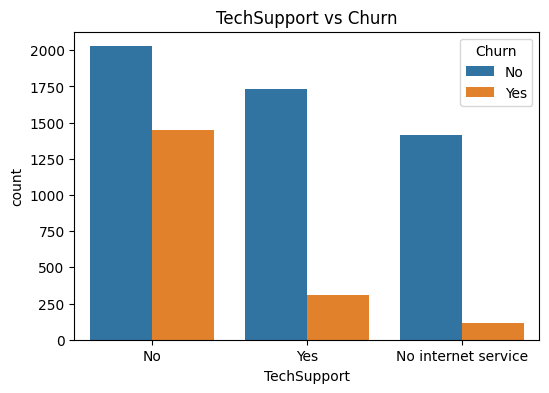

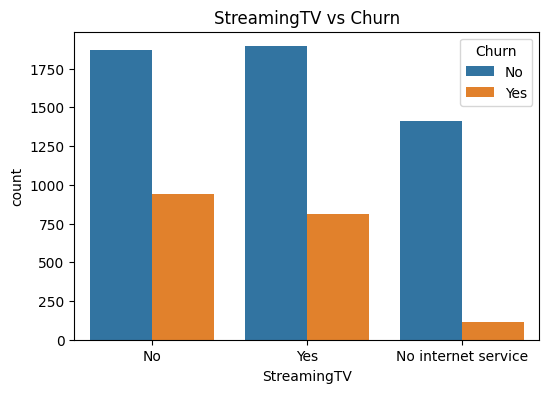

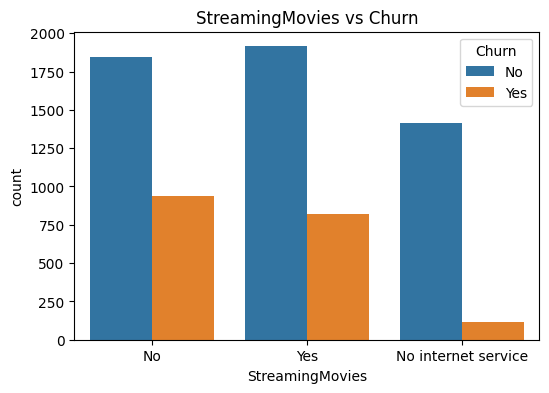

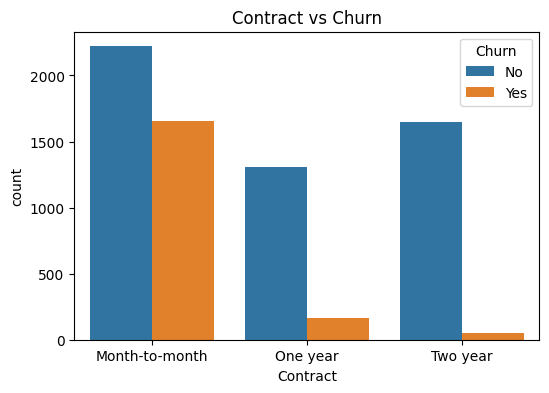

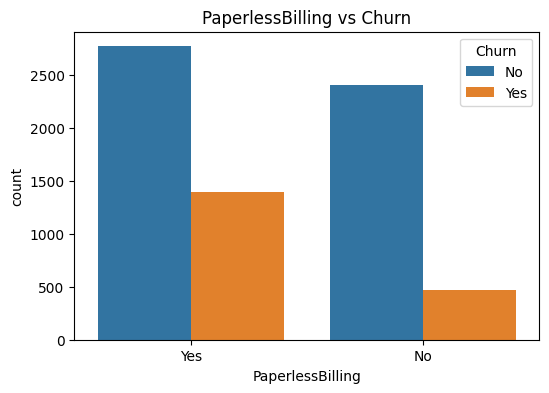

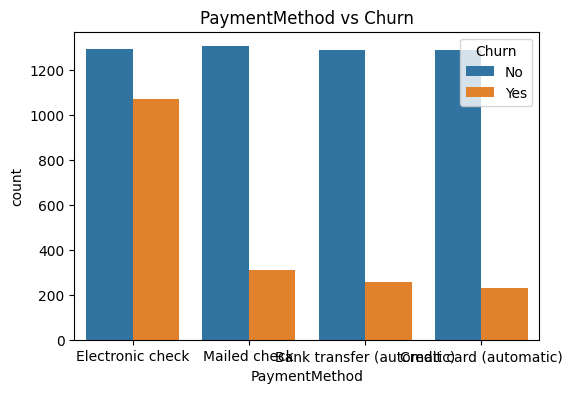

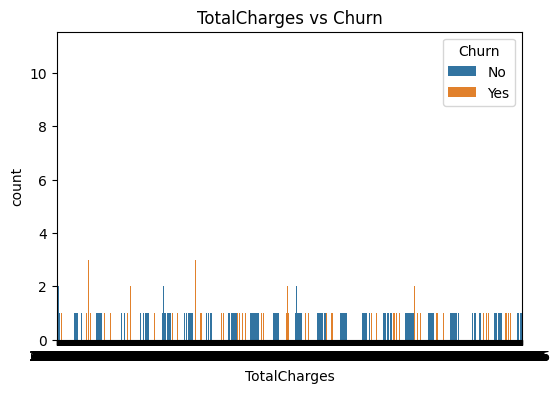

In [76]:
#categorical vs Churn
for col in categorical_cols:
  if col != 'Churn':
    plt.figure(figsize=(6,4))
    sns.countplot(x=col,hue='Churn',data=df)
    plt.title(f"{col} vs Churn")
plt.show()


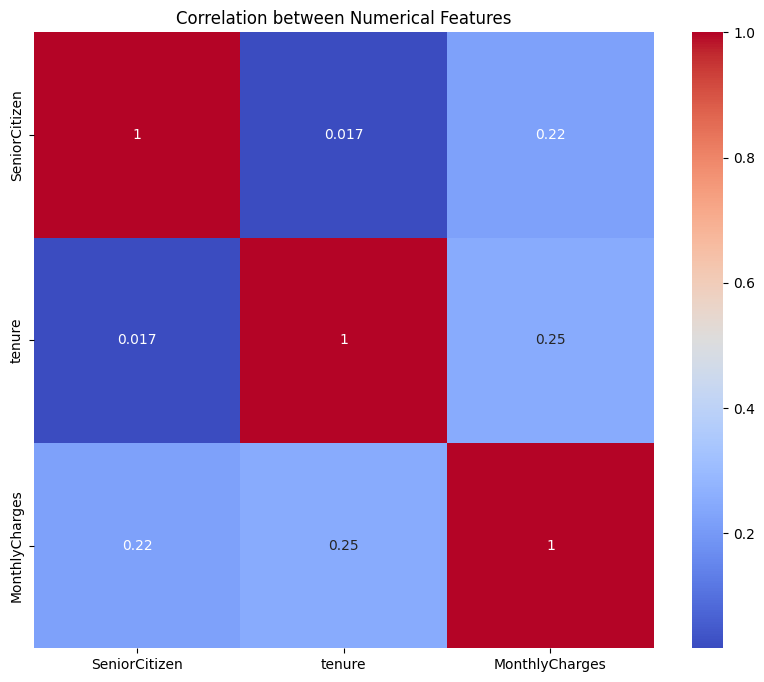

In [77]:
#Correlation Analysis (numerical features)
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')
plt.title("Correlation between Numerical Features")
plt.show()